
## YOLO Model Training Notebook

### About this Notebook

This training notebook implements a full YOLOv8 training pipeline for detecting bacterial flagellar motors in tomographic slices. The notebook:

1. **Dataset Configuration**: Sets up and validates the YOLO-format dataset YAML configuration
2. **Model Initialization**: Loads pre-trained YOLOv8 weights for transfer learning
3. **Training Process**: Fine tunes the model with early stopping and periodic checkpoints
4. **Loss Visualization**: Plots training and validation dfl loss curves to monitor progress
5. **Performance Evaluation**: Tests the trained model on random validation samples
6. **Model Export**: Saves the trained weights for use in the submission notebook

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 15.9 MB/s eta 0:00:00


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Starting YOLO training process...
Directory status:
- Train images dir exists: True
- Val images dir exists: True
- Train labels dir exists: True
- Val labels dir exists: True
Found original dataset.yaml at /kaggle/input/parse-data/yolo_dataset/dataset.yaml
Fixing YAML paths in /kaggle/input/parse-data/yolo_dataset/dataset.yaml
Created fixed YAML at /kaggle/working/fixed_dataset.yaml with path: /kaggle/input/parse-data/yolo_dataset
Using YAML file: /kaggle/working/fixed_dataset.yaml
YAML file contents:
names:
  0: motor
path: /kaggle/input/parse-data/yolo_dataset
train: images/train
val: images/val


Starting YOLO training...
Loading pre-trained weights from: yolov8n.pt


100%|██████████| 6.25M/6.25M [00:00<00:00, 85.5MB/s]


Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/fixed_dataset.yaml, epochs=30, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=/kaggle/working/yolo_weights, name=motor_detector, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_la

100%|██████████| 755k/755k [00:00<00:00, 16.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/parse-data/yolo_dataset/labels/train... 3262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3262/3262 [00:13<00:00, 235.47it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/parse-data/yolo_dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/input/parse-data/yolo_dataset/labels/val... 792 images, 0 backgrounds, 0 corrupt: 100%|██████████| 792/792 [00:03<00:00, 207.28it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/parse-data/yolo_dataset/labels is not writeable, cache not saved.
Plotting labels to /kaggle/working/yolo_weights/motor_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /kaggle/working/yolo_weights/motor_detector
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.05G       3.52      11.58       1.34         20        640: 100%|██████████| 204/204 [00:44<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:07<00:00,  3.54it/s]


                   all        792        792      0.261      0.282      0.171     0.0539

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         2G      2.669      3.457      1.062         14        640: 100%|██████████| 204/204 [00:42<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.31it/s]


                   all        792        792       0.32      0.342      0.222     0.0464

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         2G      2.485      2.315      1.019         18        640: 100%|██████████| 204/204 [00:42<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.61it/s]

                   all        792        792      0.496       0.42      0.368     0.0867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      1.99G      2.354      1.898      0.998         13        640: 100%|██████████| 204/204 [00:41<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.54it/s]

                   all        792        792      0.326      0.227      0.163      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         2G      2.229      1.715     0.9698         15        640: 100%|██████████| 204/204 [00:41<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.39it/s]

                   all        792        792      0.658       0.59      0.584      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      1.99G      2.168      1.621     0.9648         27        640: 100%|██████████| 204/204 [00:42<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.56it/s]

                   all        792        792       0.69      0.702      0.702      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      1.99G      2.065      1.508     0.9508         18        640: 100%|██████████| 204/204 [00:41<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.56it/s]

                   all        792        792      0.496      0.441      0.385     0.0939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      1.99G      1.999      1.394     0.9333         11        640: 100%|██████████| 204/204 [00:41<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]

                   all        792        792      0.492      0.386      0.315     0.0769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      1.99G      1.947       1.36     0.9239         13        640: 100%|██████████| 204/204 [00:41<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.58it/s]

                   all        792        792       0.57      0.496      0.451      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      1.99G      1.932      1.312     0.9219         16        640: 100%|██████████| 204/204 [00:42<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.45it/s]

                   all        792        792      0.693      0.598       0.55      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      1.99G      1.856      1.267     0.9059         19        640: 100%|██████████| 204/204 [00:41<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.55it/s]

                   all        792        792      0.785       0.76      0.785      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      1.99G      1.798       1.19      0.901         17        640: 100%|██████████| 204/204 [00:42<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.44it/s]

                   all        792        792      0.792      0.754       0.79      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      1.99G      1.749      1.173     0.8964         21        640: 100%|██████████| 204/204 [00:41<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.52it/s]

                   all        792        792      0.795      0.699      0.728      0.222



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      1.99G      1.754      1.172     0.8946         21        640: 100%|██████████| 204/204 [00:41<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.54it/s]

                   all        792        792      0.678      0.587      0.603      0.141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      1.99G      1.702      1.104     0.8798         18        640: 100%|██████████| 204/204 [00:41<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.58it/s]

                   all        792        792      0.819        0.8      0.837      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      1.99G      1.645       1.09     0.8786         17        640: 100%|██████████| 204/204 [00:42<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.67it/s]

                   all        792        792      0.815      0.787      0.836      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      1.99G      1.629      1.073     0.8749         12        640: 100%|██████████| 204/204 [00:42<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.46it/s]

                   all        792        792      0.787      0.777      0.814      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      1.99G      1.606      1.021      0.869         13        640: 100%|██████████| 204/204 [00:42<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.40it/s]

                   all        792        792      0.773      0.795      0.805      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      1.99G       1.56     0.9891     0.8655         21        640: 100%|██████████| 204/204 [00:41<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.47it/s]

                   all        792        792      0.774      0.769      0.782      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         2G      1.527     0.9628     0.8647          9        640: 100%|██████████| 204/204 [00:42<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.51it/s]

                   all        792        792      0.738      0.725      0.705       0.19
EarlyStopping: Training stopped early as no improvement observed in last 5 epochs. Best results observed at epoch 15, best model saved as best.pt.
To update EarlyStopping(patience=5) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



20 epochs completed in 0.271 hours.
Optimizer stripped from /kaggle/working/yolo_weights/motor_detector/weights/last.pt, 6.2MB
Optimizer stripped from /kaggle/working/yolo_weights/motor_detector/weights/best.pt, 6.2MB

Validating /kaggle/working/yolo_weights/motor_detector/weights/best.pt...
Ultralytics 8.3.85 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  4.00it/s]


                   all        792        792      0.819      0.799      0.836      0.324


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /kaggle/working/yolo_weights/motor_detector
Loss curve saved to /kaggle/working/yolo_weights/motor_detector/dfl_loss_curve.png

Best model found at epoch 15 with validation DFL loss: 0.9115

Training complete!

Running predictions on sample images...

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_00e463_z0224_y0241_x0643.jpg: 640x640 1 motor, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_00e463_z0228_y0262_x0628.jpg: 640x640 2 motors, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_656915_z0204_y0794_x0167.jpg: 640x640 1 motor, 7.3ms
Speed: 2.5ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 

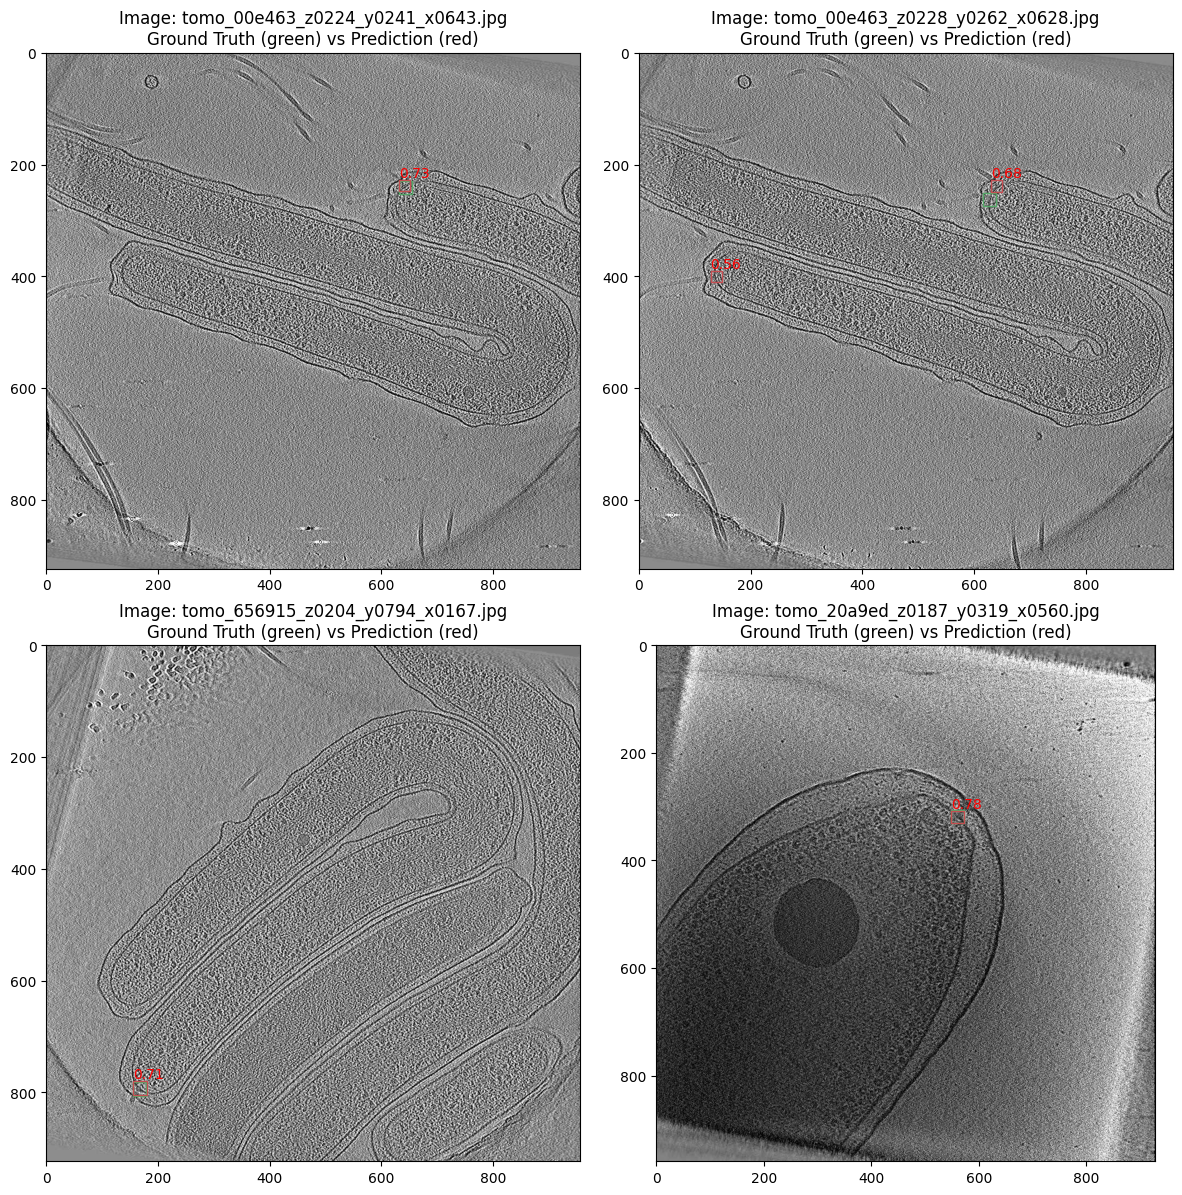

In [2]:
import os
import torch
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics import YOLO
import yaml
import pandas as pd
import json

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

# Define paths for Kaggle environment
yolo_dataset_dir = "/kaggle/input/parse-data/yolo_dataset"
yolo_weights_dir = "/kaggle/working/yolo_weights"
yolo_pretrained_weights = "yolov8n.pt"  # Path to pre-downloaded weights

# Create weights directory if it doesn't exist
os.makedirs(yolo_weights_dir, exist_ok=True)

def fix_yaml_paths(yaml_path):
    """
    Fix the paths in the YAML file to match the actual Kaggle directories
    
    Args:
        yaml_path (str): Path to the original dataset YAML file
        
    Returns:
        str: Path to the fixed YAML file
    """
    print(f"Fixing YAML paths in {yaml_path}")
    
    # Read the original YAML
    with open(yaml_path, 'r') as f:
        yaml_data = yaml.safe_load(f)
    
    # Update paths to use actual dataset location
    if 'path' in yaml_data:
        yaml_data['path'] = yolo_dataset_dir
    
    # Create a new fixed YAML in the working directory
    fixed_yaml_path = "/kaggle/working/fixed_dataset.yaml"
    with open(fixed_yaml_path, 'w') as f:
        yaml.dump(yaml_data, f)
    
    print(f"Created fixed YAML at {fixed_yaml_path} with path: {yaml_data.get('path')}")
    return fixed_yaml_path

def plot_dfl_loss_curve(run_dir):
    """
    Plot the DFL loss curves for train and validation, marking the best model
    
    Args:
        run_dir (str): Directory where the training results are stored
    """
    # Path to the results CSV file
    results_csv = os.path.join(run_dir, 'results.csv')
    
    if not os.path.exists(results_csv):
        print(f"Results file not found at {results_csv}")
        return
    
    # Read results CSV
    results_df = pd.read_csv(results_csv)
    
    # Check if DFL loss columns exist
    train_dfl_col = [col for col in results_df.columns if 'train/dfl_loss' in col]
    val_dfl_col = [col for col in results_df.columns if 'val/dfl_loss' in col]
    
    if not train_dfl_col or not val_dfl_col:
        print("DFL loss columns not found in results CSV")
        print(f"Available columns: {results_df.columns.tolist()}")
        return
    
    train_dfl_col = train_dfl_col[0]
    val_dfl_col = val_dfl_col[0]
    
    # Find the epoch with the best validation loss
    best_epoch = results_df[val_dfl_col].idxmin()
    best_val_loss = results_df.loc[best_epoch, val_dfl_col]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot training and validation losses
    plt.plot(results_df['epoch'], results_df[train_dfl_col], label='Train DFL Loss')
    plt.plot(results_df['epoch'], results_df[val_dfl_col], label='Validation DFL Loss')
    
    # Mark the best model with a vertical line
    plt.axvline(x=results_df.loc[best_epoch, 'epoch'], color='r', linestyle='--', 
                label=f'Best Model (Epoch {int(results_df.loc[best_epoch, "epoch"])}, Val Loss: {best_val_loss:.4f})')
    
    # Add labels and legend
    plt.xlabel('Epoch')
    plt.ylabel('DFL Loss')
    plt.title('Training and Validation DFL Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the plot in the same directory as weights
    plot_path = os.path.join(run_dir, 'dfl_loss_curve.png')
    plt.savefig(plot_path)
    
    # Also save it to the working directory for easier access
    plt.savefig(os.path.join('/kaggle/working', 'dfl_loss_curve.png'))
    
    print(f"Loss curve saved to {plot_path}")
    plt.close()
    
    # Return the best epoch info
    return best_epoch, best_val_loss

def train_yolo_model(yaml_path, pretrained_weights_path, epochs=30, batch_size=16, img_size=640):
    """
    Train a YOLO model on the prepared dataset
    
    Args:
        yaml_path (str): Path to the dataset YAML file
        pretrained_weights_path (str): Path to pre-downloaded weights file
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training
        img_size (int): Image size for training
    """
    print(f"Loading pre-trained weights from: {pretrained_weights_path}")
    
    # Load a pre-trained YOLOv8 model
    model = YOLO(pretrained_weights_path)
    
    # Train the model with early stopping
    results = model.train(
        data=yaml_path,
        epochs=epochs,
        batch=batch_size,
        imgsz=img_size,
        project=yolo_weights_dir,
        name='motor_detector',
        exist_ok=True,
        patience=5,              # Early stopping if no improvement for 5 epochs
        save_period=5,           # Save checkpoints every 5 epochs
        val=True,                # Ensure validation is performed
        verbose=True             # Show detailed output during training
    )
    
    # Get the path to the run directory
    run_dir = os.path.join(yolo_weights_dir, 'motor_detector')
    
    # Plot and save the loss curve
    best_epoch_info = plot_dfl_loss_curve(run_dir)
    
    if best_epoch_info:
        best_epoch, best_val_loss = best_epoch_info
        print(f"\nBest model found at epoch {best_epoch} with validation DFL loss: {best_val_loss:.4f}")
    
    return model, results

def predict_on_samples(model, num_samples=4):
    """
    Run predictions on random validation samples and display results
    
    Args:
        model: Trained YOLO model
        num_samples (int): Number of random samples to test
    """
    # Get validation images
    val_dir = os.path.join(yolo_dataset_dir, 'images', 'val')
    if not os.path.exists(val_dir):
        print(f"Validation directory not found at {val_dir}")
        # Try train directory instead if val doesn't exist
        val_dir = os.path.join(yolo_dataset_dir, 'images', 'train')
        print(f"Using train directory for predictions instead: {val_dir}")
        
    if not os.path.exists(val_dir):
        print("No images directory found for predictions")
        return
    
    val_images = os.listdir(val_dir)
    
    if len(val_images) == 0:
        print("No images found for prediction")
        return
    
    # Select random samples
    num_samples = min(num_samples, len(val_images))
    samples = random.sample(val_images, num_samples)
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    for i, img_file in enumerate(samples):
        if i >= len(axes):
            break
            
        img_path = os.path.join(val_dir, img_file)
        
        # Run prediction
        results = model.predict(img_path, conf=0.25)[0]
        
        # Load and display the image
        img = Image.open(img_path)
        axes[i].imshow(np.array(img), cmap='gray')
        
        # Draw ground truth box if available (from filename)
        try:
            # This assumes your filenames contain coordinates in a specific format
            parts = img_file.split('_')
            y_part = [p for p in parts if p.startswith('y')]
            x_part = [p for p in parts if p.startswith('x')]
            
            if y_part and x_part:
                y_gt = int(y_part[0][1:])
                x_gt = int(x_part[0][1:].split('.')[0])
                
                box_size = 24
                rect_gt = Rectangle((x_gt - box_size//2, y_gt - box_size//2), 
                              box_size, box_size, 
                              linewidth=1, edgecolor='g', facecolor='none')
                axes[i].add_patch(rect_gt)
        except:
            pass  # Skip ground truth if parsing fails
        
        # Draw predicted boxes (red)
        if len(results.boxes) > 0:
            boxes = results.boxes.xyxy.cpu().numpy()
            confs = results.boxes.conf.cpu().numpy()
            
            for box, conf in zip(boxes, confs):
                x1, y1, x2, y2 = box
                rect_pred = Rectangle((x1, y1), x2-x1, y2-y1, 
                                     linewidth=1, edgecolor='r', facecolor='none')
                axes[i].add_patch(rect_pred)
                axes[i].text(x1, y1-5, f'{conf:.2f}', color='red')
        
        axes[i].set_title(f"Image: {img_file}\nGround Truth (green) vs Prediction (red)")
    
    plt.tight_layout()
    
    # Save the predictions plot
    plt.savefig(os.path.join('/kaggle/working', 'predictions.png'))
    plt.show()

# Check and create a dataset YAML if needed
def prepare_dataset():
    """
    Check if dataset exists and create a proper YAML if needed
    
    Returns:
        str: Path to the YAML file to use for training
    """
    # Check if images exist
    train_images_dir = os.path.join(yolo_dataset_dir, 'images', 'train')
    val_images_dir = os.path.join(yolo_dataset_dir, 'images', 'val')
    train_labels_dir = os.path.join(yolo_dataset_dir, 'labels', 'train')
    val_labels_dir = os.path.join(yolo_dataset_dir, 'labels', 'val')
    
    # Print directory existence status
    print(f"Directory status:")
    print(f"- Train images dir exists: {os.path.exists(train_images_dir)}")
    print(f"- Val images dir exists: {os.path.exists(val_images_dir)}")
    print(f"- Train labels dir exists: {os.path.exists(train_labels_dir)}")
    print(f"- Val labels dir exists: {os.path.exists(val_labels_dir)}")
    
    # Check for original YAML file
    original_yaml_path = os.path.join(yolo_dataset_dir, 'dataset.yaml')
    
    if os.path.exists(original_yaml_path):
        print(f"Found original dataset.yaml at {original_yaml_path}")
        # Fix the paths in the YAML
        return fix_yaml_paths(original_yaml_path)
    else:
        print(f"Original dataset.yaml not found, creating a new one")
        
        # Create a new YAML file
        yaml_data = {
            'path': yolo_dataset_dir,
            'train': 'images/train',
            'val': 'images/train' if not os.path.exists(val_images_dir) else 'images/val',
            'names': {0: 'motor'}
        }
        
        new_yaml_path = "/kaggle/working/dataset.yaml"
        with open(new_yaml_path, 'w') as f:
            yaml.dump(yaml_data, f)
            
        print(f"Created new YAML at {new_yaml_path}")
        return new_yaml_path

# Main execution
def main():
    print("Starting YOLO training process...")
    
    # Prepare dataset and get YAML path
    yaml_path = prepare_dataset()
    print(f"Using YAML file: {yaml_path}")
    
    # Print YAML file contents
    with open(yaml_path, 'r') as f:
        yaml_content = f.read()
    print(f"YAML file contents:\n{yaml_content}")
    
    # Train model
    print("\nStarting YOLO training...")
    model, results = train_yolo_model(
        yaml_path,
        pretrained_weights_path=yolo_pretrained_weights,
        epochs=30  # Using 30 epochs instead of 100 for faster training
    )
    
    print("\nTraining complete!")
    
    # Run predictions
    print("\nRunning predictions on sample images...")
    predict_on_samples(model, num_samples=4)

if __name__ == "__main__":
    main()